<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsanalyzecryptomarketswiththecoinbaseapi457-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Create a Cryptocurrency Trading Algorithm in Python**


Estimated time needed: **30** minutes


The prominence of Cryptocurrencies as a means of transaction and investment vehicle has seen astronomical growth in recent years - but what is it and how is it different than the traditional currencies we're used to? The currencies you are familar with and likely use on a day-to-day basis, such as the US Dollar and the Euro, are known as _fiat currencies_. They are issued by the government and there exists a central authority, such as a central bank, to regulate and govern it's use. In stark contrast, a defining feature of a _Cryptocurrency_ is that there is no central regulatory authority. Instead, transactions are held in a ledger or database which is secured cryptographically. Both types of currencies have their advantages and disadvantages.

While this is all interesting, the most important question you might be asking is "what's in it for me?" As an individual investor, you may find success in trading Cryptocurrencies to take home a profit - but unfortunately, that often involves a significant time investment, tracking charts and prices to determine what the next trade to make is. If that sounds appealing, then by all means, enjoy! It is certainly a viable option.

If, however, you prefer a little more of a hands-off approach, a trading algorithm may be here to save the day. Algorithmic trading is a way to automate making decisions on when to buy or sell an asset based on some pre-programmed instructions and criteria. You design and implement a trading strategy and let the computer do the work for you! If the strategy is effective and well-tested, then you can potentially earn money while you sleep without having to spend hours staring at charts.

In this Guided Project, you will take a first dive into the world of algorithmic trading by implementing a simple strategy and testing its performance.


## **What you will Learn**


_After completing this guided project you will be able to:_

* Fetch Cryptocurrency market prices and data
* Perform basic analysis of market behaviour
* Implement a simple algorithmic trading strategy
* Analyze the performance of the trading algorithm


---


## **Let's get started**


First, we'll need a way to retrieve the cryptocurrency market data we need. Yahoo Finance is a popular website and service that provides up-to-date financial news and market quotes. Luckily, there is a Python library called `yfinance` that allows you to easily access and save this data. Let's go ahead and install it.


In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 68.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 18.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138904 sha256=c68bed9fec0fa8a376ee8aec37ce2c9a0a8536e355cc24fdcda18397fc406fd6
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/f1/7b/c1/9d03c97d624cc2ac99476fbbebb76be81e3505d9569bb02cf8
Successfully built peewee
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully unin

We'll also use a few other Python libraries to do some basic analysis of the cryptocurrency market data. Let's go ahead and install those too. If you are running this notebook in SKills Network Labs, pandas, numpy, and matplotlib are already installed so the following lines have been commented out. If you are running this notebook elsewhere, you can uncomment the `pip install` lines and run the cells.


In [2]:
# pip install pandas

In [3]:
# pip install numpy

In [ ]:
# pip install matplotlib

Now let's import the libraries we're going to use.


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

---


## **Get Familiar with Bitcoin-USD Exchange Rate Data**


The yfinance library has a built-in method for retrieving historical market data. Let's use this to get the exchange rate of Bitcoin to US Dollars over the year of 2020. We use the `download()` method, passing in the ticker we're interested in ("BTC-USD"), the start and end dates, and the time interval between datapoints. Let's use a 1 day interval.


In [5]:
# Retrieve two weeks of Bitcoin to USD exchange rates with a 1 hour interval and save the dataframe to a variable.
BTC_USD = yf.download("BTC-USD", start='2020-01-01', end='2020-12-31', interval='1d')

[*********************100%***********************]  1 of 1 completed


Now we have a dataframe assigned to the variable `BTC_USD` storing the historical BTC-USD exchange over 2020. To get a sense for the data we have, try calling the `head()` method from the pandas library on the dataframe. 


**Try it yourself:** Call the `head()` method on the `BTC_USD` variable.


In [7]:
# Enter your code below and run the cell
BTC_USD.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2020-01-01 00:00:00+00:00,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02 00:00:00+00:00,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03 00:00:00+00:00,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04 00:00:00+00:00,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05 00:00:00+00:00,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


<details>
<summary><strong>Hint</strong> (Click Here)</summary>
    &emsp; &emsp; The solution is just one line of code!
</details>


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>BTC_USD.head()</code>
</details>


As you can see, the dataframe has 7 columns. The first column gives the date, the second column gives the opening price of Bitcoin in USD for the day, followed by the day's price high and low, then the day's closing and adjusted closing prices, and finally, the trading volume.


### **Create a Price Chart**


A great way to get a feel for the data you're working with is to create a basic plot to visualize it. Price charts are an essential tool for understanding and analyzing a given stock or currency. They are a time series showing an asset's price over time. The most basic type of price chart is the _line chart_, so let's go ahead and make one of those. 

In a line chart, we connect the adjusted closing price of the asset at the end of each day with a continuous line. We can use the matploitlib library to easily create our price chart. Let's do it!


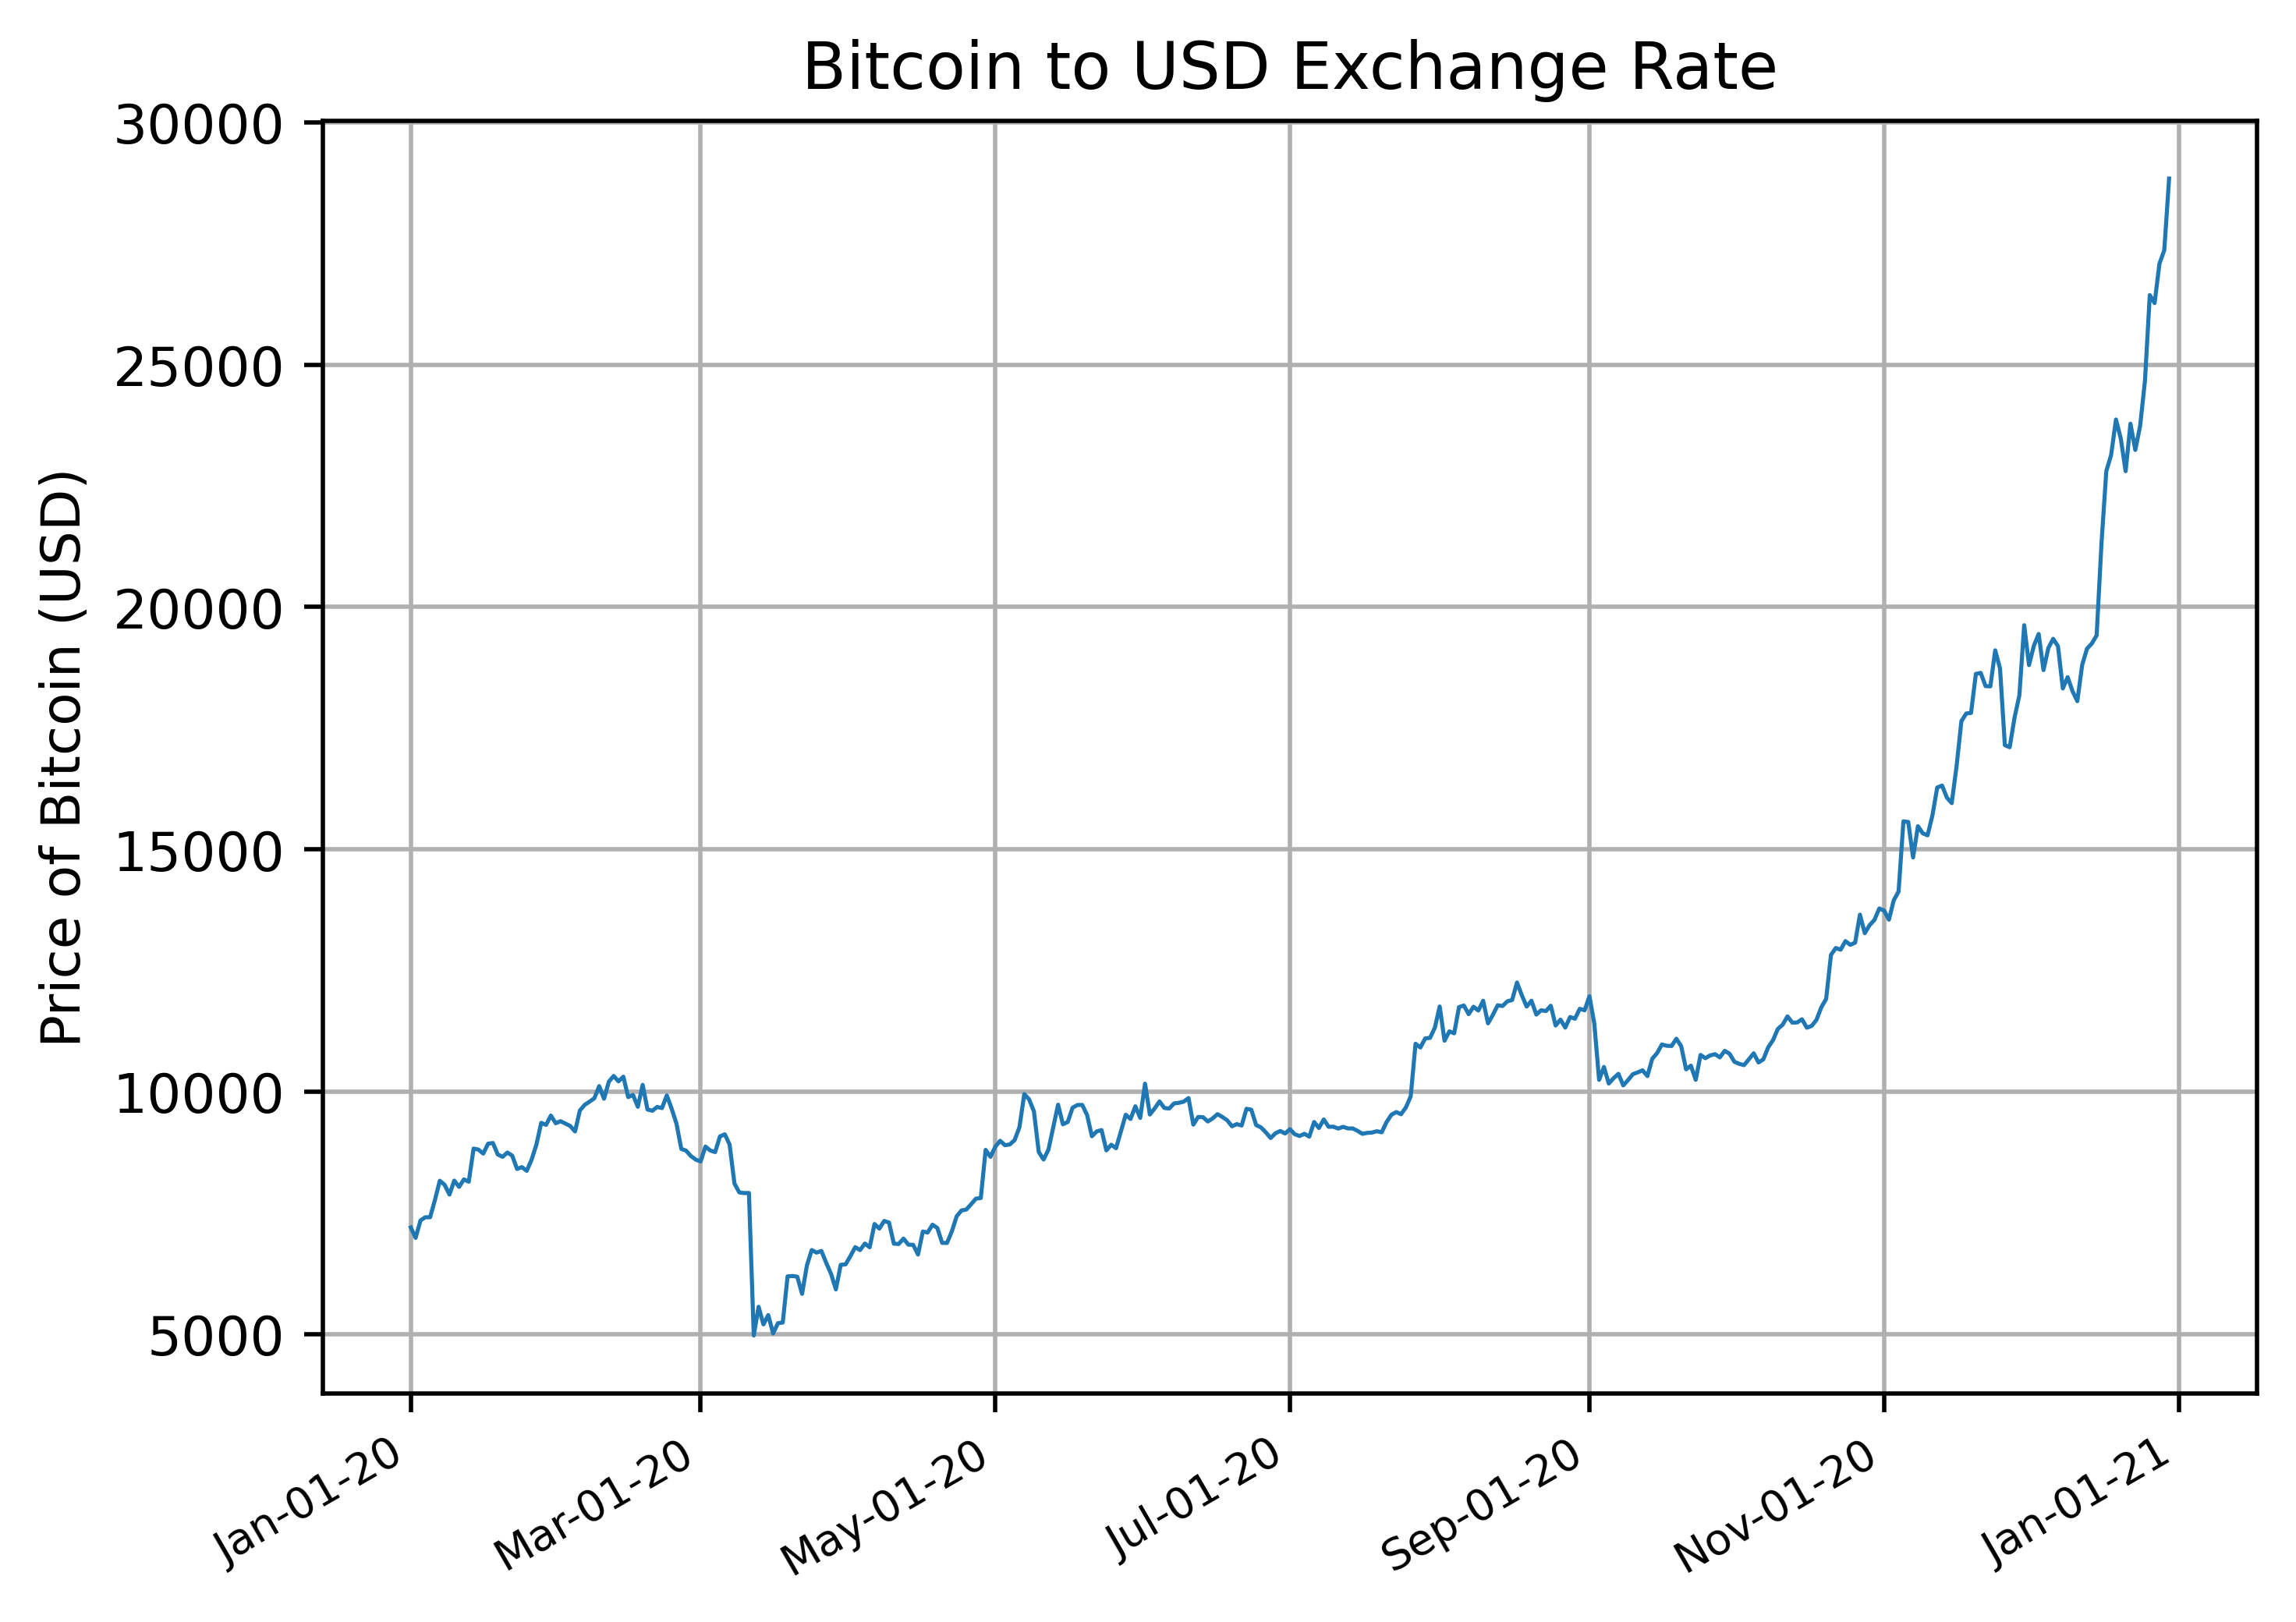

In [8]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid

# Displaying the price chart
plt.show()

Looks great! We can see how the exchange range of BTC to USD has changed over the course of 2020. Just with a first glance we see that there's a steep upward trend in Bitcoin price starting around October. However, due to the somewhat random nature of short term price movements, the line chart fluctuates and looks noisy.

To help reveal longer term trends and smooth out short term fluctuations, a common method is to calculate and study _Moving Averages_.


---


## **Do Some Basic Analysis**


A Moving Average is a staple in the analysis of price charts. It's calculated by creating a series of averages of subsets of the data we have. For example, in a 9-day moving average, each point of the chart is calculated as the mean closing price of the previous 9 days. This has the effect of smoothing out short term fluctuations in the chart, which is helpful for gaining an understanding of the longer term price trends of a stock or currency. The longer the sampling period of a  Moving Average, the greater the smoothing effect. In practice, you might want to use several Moving Averages of different sampling periods, even overlaid on the same chart.

Let's go ahead and compute some Simple Moving Averages and plot them over the price chart you created earlier.


###  Compute Simple Moving Averages


First, let's understand how Simple Moving Averages are computed. Suppose you have 9 days of data and want to compute the 3 day Simple Moving Average:

| ***Day***   | 1 | 2 | 3 | 4 | 5  | 6  | 7 | 8 | 9 |
|-------|---|---|---|---|----|----|---|---|---|
| ***Value*** | 4 | 3 | 5 | 7 | 10 | 11 | 9 | 7 | 6 |

Then the first data point for the moving average using the above values would be $SMA_1 = \frac{4 + 3 + 5}{3} = 4$ , then the 3-day interval "slides" one column to the right and so the second SMA point is computed as $SMA_2 = \frac{3 + 5 + 7}{3} = 5$. This process continues for the remainder of the data and we obtain:

| ***Day***   | 1 | 2 | 3 | 4 | 5  | 6  | 7 | 8 | 9 |
|-------|---|---|---|---|----|----|---|---|---|
| ***Value*** | 4 | 3 | 5 | 7 | 10 | 11 | 9 | 7 | 6 |
| ***3-day SMA*** | n/a | n/a | 4 | 5 | 7.33 | 9.33 | 10 | 9 | 7.33 |


As you can see, calculating all of this by hand would get tiresome very quickly. Fortunately, the pandas library makes it very straightforward to compute Moving Averages with just a single line of code! Let's see how do to it with a 9-day moving average, then you can try it yourself with a different time interval.


In [9]:
# Compute a 9-day Simple Moving Average with pandas
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

In the code above, you added a new column to the `BTC_USD` dataframe called `SMA_9` that contains the datapoints for a 9-day Simple Moving Average.

**Try it yourself:** Add a column to `BTC_USD` containing a Simple Moving Average using an interval size of 30 days.


In [10]:
# Add your code below and run the cell
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()

<details>
<summary><strong>Hint</strong> (Click Here)</summary>
    &emsp; &emsp; Take a look at the code cell you ran to create the 9-day Simple Moving Average. Where in the code does it specify the length of the interval and how can you modify for an interval of your choice?
</details>


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()</code>
</details>


Great! Now you should have two new columns in the `BTC_USD` dataframe containing two Simple Moving Averages of different length intervals. Let's go ahead and double check that this is the case. Similar to the `head()` method, the `tail()` method gives a preview of a dataframe, only this time, it shows the last 5 entries instread of the first 5.


In [11]:
# Display the last 5 entries of the dataframe
BTC_USD.tail()

Price,Adj Close,Close,High,Low,Open,Volume,SMA_9,SMA_30
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
Date,,,,,,,,
2020-12-26 00:00:00+00:00,26437.037109,26437.037109,26718.070312,24522.689453,24677.015625,48332647295,23905.591363,20518.139062
2020-12-27 00:00:00+00:00,26272.294922,26272.294922,28288.839844,25922.769531,26439.373047,66479895605,24253.850694,20823.602148
2020-12-28 00:00:00+00:00,27084.808594,27084.808594,27389.111328,26207.640625,26280.822266,49056742893,24611.070312,21135.848633
2020-12-29 00:00:00+00:00,27362.437500,27362.437500,27370.720703,25987.298828,27081.810547,45265946774,25042.752821,21442.013737
2020-12-30 00:00:00+00:00,28840.953125,28840.953125,28937.740234,27360.089844,27360.089844,51287442704,25713.627387,21749.184310


### Plot the Simple Moving Averages


You've computed the Simple Moving Averages but the raw numbers are difficult to interpret and find trends in, so let's go ahead and plot them to get a visual understanding of the trends. You will commonly see the Simple Moving Averages plotted on top of the price chart, so let's do that. We can reuse much of our code from the linechart we created earlier and simply plot the Moving Averages over top.


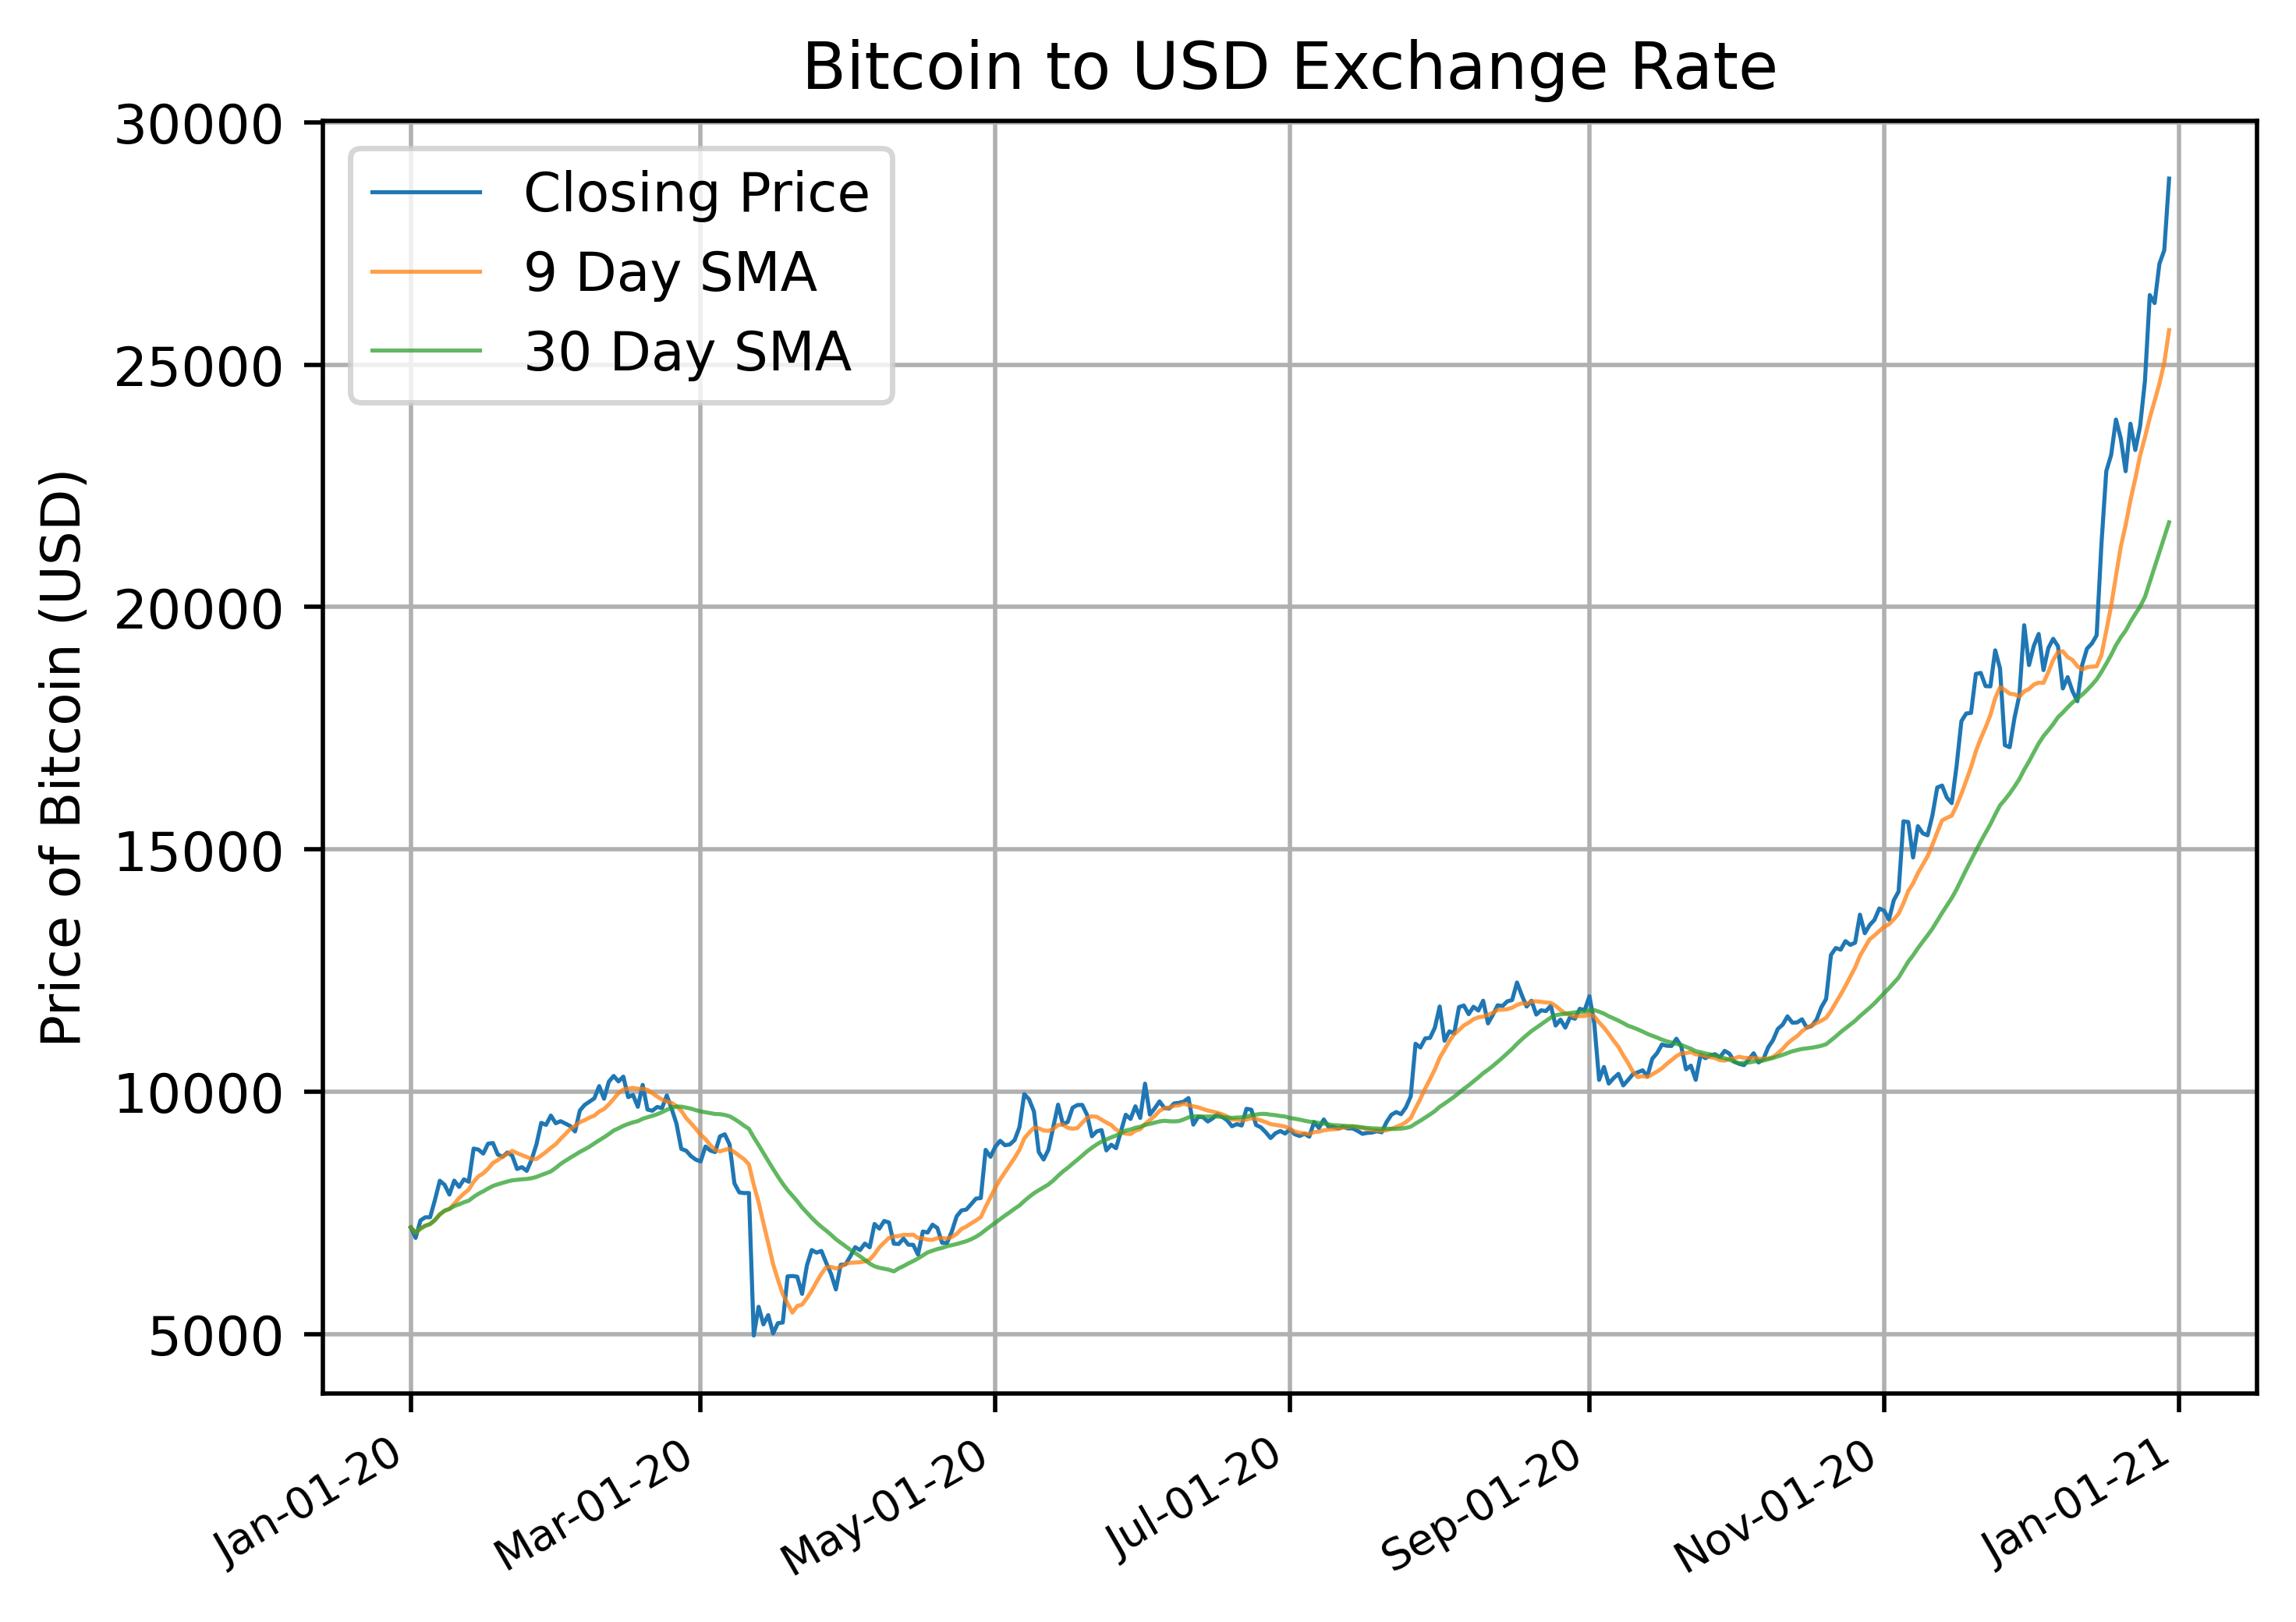

In [12]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

"""
You have already seen the code above earlier - we are simply reusing it.
Below we plot the 9 and 30 day Simple Moving Averages and give them the appropriate label
"""
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

From the plot you can see that the Simple Moving Averages had a smoothing effect on the line chart - much of the short term Bitcoin price fluctuations were smoothed out and the moving averages appear to reveal some longer term trends. As expected, the 30 day interval had a more significant smoothing effect than the 9 day interval. 

There are many trading strategies that make great use of Moving Averages, which you can read more about [***here***](https://www.investopedia.com/ask/answers/122314/how-do-i-use-moving-average-ma-create-forex-trading-strategy.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsanalyzecryptomarketswiththecoinbaseapi457-2023-01-01) if you are interested.


---


## **Strategize. Conquer.**


_“A goal without a plan is just a wish.”_
 — Antoine de Saint-Exupéry


If you are interested in the cryptocurrency market, chances are you're interested in making a profit. As you're likely well aware, the general principle is to buy an asset at a low price, then sell it at a higher price and pocket the difference. The tricky part is that unless you can see the future (in which case, call us), it's not easy to know which direction the price will move after you buy it. Fortunately, we can try to improve our chances of making a good trade beyond blind luck by sticking to a trading strategy. A great number of trading strategies exist with varying levels of complexity so let's take a look at just one of them for now.

<br>

One of the simplest trading strategies making use of Simple Moving Averages is the [***Moving Average Crossover***](https://en.wikipedia.org/wiki/Moving_average_crossover?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsanalyzecryptomarketswiththecoinbaseapi457-2023-01-01). The basic idea behind this strategy is to use two Simple Moving Averages - one with a relatively short sampling interval and the other with a longer interval. When the shorter moving average crosses over the longer interval moving average, it can signal a reversal in trend. For example, if the shorter term moving average is below the longer moving average but then crosses over to the top of it, this may signal the beginning of an upwards (bullish) trend. Using the _Moving Average Crossover_ strategy, this would be a _buy_ signal. Similarily, when the shorter moving average is above the longer interval one and it crosses under, this could signal a downward (bearish) trend, which would be a _sell_ signal in this strategy.`

<br>

The simplicity of this approach makes it an excellent first strategy to implement. Let's jump right into it and get to work on implementing an algorithm that does all that pesky thinking for us!


In [13]:
# Create a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Define the intervals for the Fast and Slow Simple Moving Averages (in days)
short_interval = 10
long_interval = 40

# Compute the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

Now we have a dataframe containing the dates we're interested in and two Simple Moving Averages, one with a short interval and the other with a longer sampling interval. This gives us the information we need to figure out where the two Moving Averages cross, which is the core of this trading strategy. Let's create a new column called `Signal` that is populated everywhere with zeros, except for a one wherever the two Moving Averages cross.


In [15]:
# Create a new column populated with zeros
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   

trade_signals

,Short,Long,Signal
Date,,,
2020-01-01 00:00:00+00:00,7200.174316,7200.174316,0.0
2020-01-02 00:00:00+00:00,7092.822266,7092.822266,0.0
2020-01-03 00:00:00+00:00,7176.842936,7176.842936,0.0
2020-01-04 00:00:00+00:00,7235.296387,7235.296387,0.0
2020-01-05 00:00:00+00:00,7270.500586,7270.500586,0.0
...,...,...,...
2020-12-26 00:00:00+00:00,23795.548438,19944.963818,1.0
2020-12-27 00:00:00+00:00,24142.261719,20160.636035,1.0
2020-12-28 00:00:00+00:00,24536.946484,20392.656104,1.0


The two lines of code you executed above give us a column called `Signal`. At every date where the short-term moving average is above the long-term moving average for at least a period of time equal to `short_interval`, the value is 1.0 and 0.0 elsewhere. This is great information but we're not quite yet done. We're interested in determining at what point we should actually buy and sell our Bitcoin.

According to our _Moving Average Crossover_ strategy, we want to buy when the short-term SMA crosses the long-term SMA from below, and sell when it crosses over from above. We can easily use the `Signal` column in the `trade_signals` dataframe to determine where exactly these events occur. If the `Signal` column has value 0.0 on a given date then switches to 1.0, this means the short-term SMA crossed the long-term SMA from _below_ - this is our time to **buy** Bitcoin according to our strategy. On the other hand, if the value goes from 1.0 to 0.0, that tells us the short-term SMA was _above_ the long-term SMA and then crossed over - this is our time to **sell**.

Let's create a new column in the dataframe called `Positions`, where for each date in the dataframe it will tell the algorithm which action to take. A value of 1.0 will represent a _buy_ order, a -1.0 will be a _sell_ order, and a value of 0.0 will tell the algorithm to take no action. To compute these values from the `Signal` column, the `diff()` method from the pandas library will prove extraordinarily useful. The [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsanalyzecryptomarketswiththecoinbaseapi457-2023-01-01) for this method tells us that it calculates the difference of a Dataframe element compared with another element in the Dataframe, with the default being the element in the previous row.

Using this method, we can easily compute the action the algorithm should take at each step. Suppose the short-term SMA is below the long-term SMA. Then for that period, the `Signal` column will have the value 0. Then suppose we have a crossing, such that the short-term SMA now moves above the long-term one. Then the `Signal` column will now have value 1.0 and so the `diff()` method will compute the difference between the `Signal` value that day and the one before, i.e., $1 - 0 = 1$, thus giving us a `Positions` value of 1 for that day (i.e., a **buy** order). The opposite scenario occurs when the short-term SMA crosses back underneath the long-term SMA. the `diff()` method assigns a value of $0 - 1 = -1$ to the `Position` column on the day of the crossing (i.e., a **sell** order). On the days where there is no crossing, each consecutive day has the same value in the `Signal` column, so the `diff()` method assigns a value of 0 to the `Position` column.

<br>

Phew! That was a lot of reading, let's go ahead and actually do it. Luckily all that thinking and computation is condensed into one simple line of code.

**Try it yourself:** Create a new column in the `trade_signals` Dataframe called `Position` by calling the `diff()` method on the `Signal` column.


In [18]:
# Enter your code below and run the cell
trade_signals['Position']=trade_signals['Signal'].diff()

trade_signals.fillna(0)

,Short,Long,Signal,Position
Date,,,,
2020-01-01 00:00:00+00:00,7200.174316,7200.174316,0.0,0.0
2020-01-02 00:00:00+00:00,7092.822266,7092.822266,0.0,0.0
2020-01-03 00:00:00+00:00,7176.842936,7176.842936,0.0,0.0
2020-01-04 00:00:00+00:00,7235.296387,7235.296387,0.0,0.0
2020-01-05 00:00:00+00:00,7270.500586,7270.500586,0.0,0.0
...,...,...,...,...
2020-12-26 00:00:00+00:00,23795.548438,19944.963818,1.0,0.0
2020-12-27 00:00:00+00:00,24142.261719,20160.636035,1.0,0.0
2020-12-28 00:00:00+00:00,24536.946484,20392.656104,1.0,0.0


<details>
<summary><strong>Hint</strong> (Click Here)</summary>
The documentation for the `diff()` method of the pandas library can be found [**here**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html). It may be a helpful reference in using the method to create the `Positions` column.
</details>


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>trade_signals['Position'] = trade_signals['Signal'].diff()</code>
</details>


---


## **Test your Strategy**


Excellent, you now have the algorithm's decisions on when to buy and sell and Bitcoin over the year of 2020. 

Let's make a plot to visualize the algorithm's trades before going into more detail and analyzing its performance quantiatively. You will plot the closing price and the two Simple Moving Averages you computed as part of the trading strategy. Furthermore, where the trading algorithm decides to make a **buy** order, we will plot an upwards facing green arrow. Where the algorithm places a **sell** order, we will plot a downwards facing red arrow.


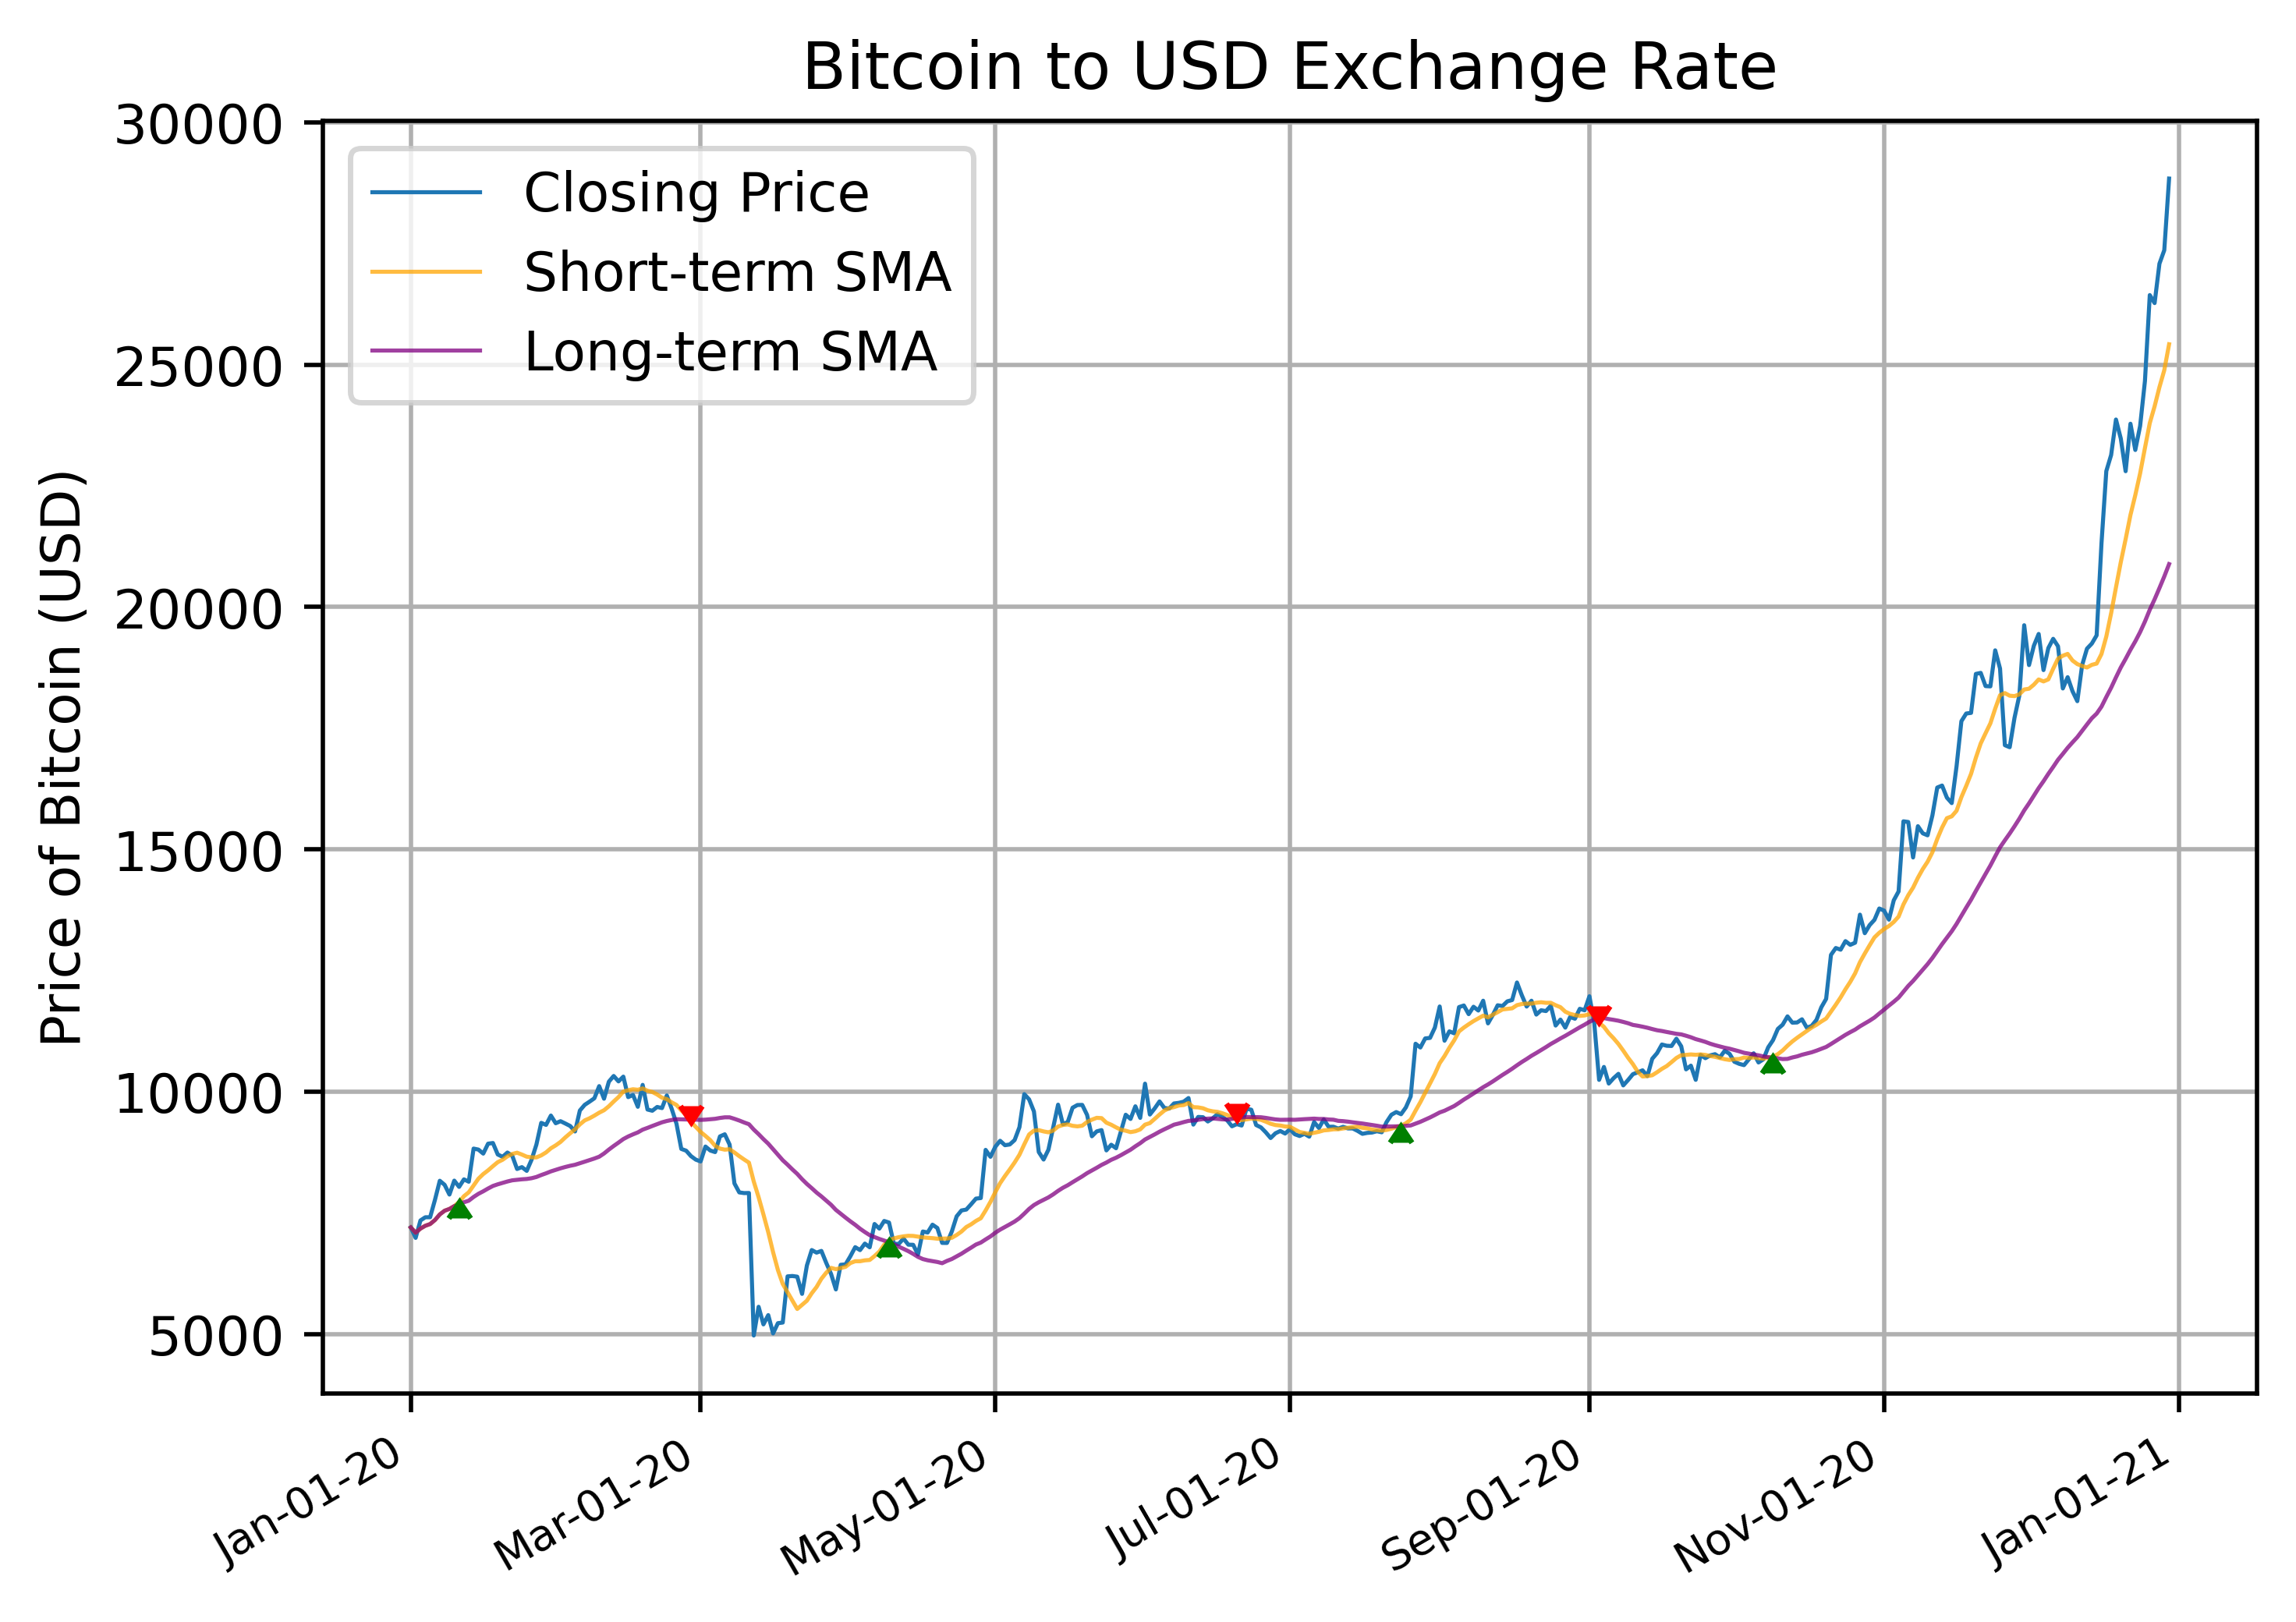

In [19]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

Nice! With a quick glance it looks like our algorithm is working as it should. It appears to have bought Bitcoin at relative lows and sold later at a higher price. Feel free to go back and change the values of the `short_interval` and `long_interval` variables to see how that changes things. For now, we'll continue on with the parameters we have and do some quantitative analysis to see how our algorithm performed.


### **Backtest your Algorithm**


Once you have a trading algorithm implemented, you will certainly want to test it to see if it can actually produce a profit and compare its performace with other strategies. Often, the first way to do this is to perform a [**backtest**](https://www.investopedia.com/terms/b/backtesting.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsanalyzecryptomarketswiththecoinbaseapi457-2023-01-01). The core idea behind a backtest is to simulate running your trading algorithm on historical data and compute several metrics, such as the return. While this method certainly _does not_ guarantee that the algorithmn will be consistently profitable, it's a quick way to test the viability of a strategy and reject clearly unfeasable strategies.

Let's do a simple backtest over the 2020 BTC-USD data on the trading algorithm we implemented. There are many libraries that can perform sophisticated backtests on a variety of algorithms, however, to develop an understanding of the underlying principle, let's implement our own simple backtest. Let's suppose we start with an account with $10,000 USD.


In [20]:
# Define how much money you will start with (in USD)
initial_balance = 10000.0 # ten thousand USD

# Create dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

# Add column containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1) # Current closing price / yesterday's closing price


Now to compute the daily returns of the trading algorithm, let's assume that at any given point, our portfolio is either all in on Bitcoin or is entirely holding USD. This means that whenever the algorithm is currently holding Bitcoin, it's daily returns are the same as the daily returns of Bitcoin. On the other hand, when the algorithm is holding USD, its returns are entirely detached from Bitcoin price movements. Thus when holding USD, the value of the portfolio remains constant during that period. We will also make the simplifying assumption that we are able to perform zero comission trades. This reasoning is condensed into the following two lines of code.


In [21]:

# Add column containing the daily percent returns of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

# Add column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod() # cumulative product

Let's make a plot comparing the performance of trading algorithm we implemented and a simple "Buy and Hold" strategy which will serve as a baseline. Plot the value of the portfolio using either strategy over the course of 2020.


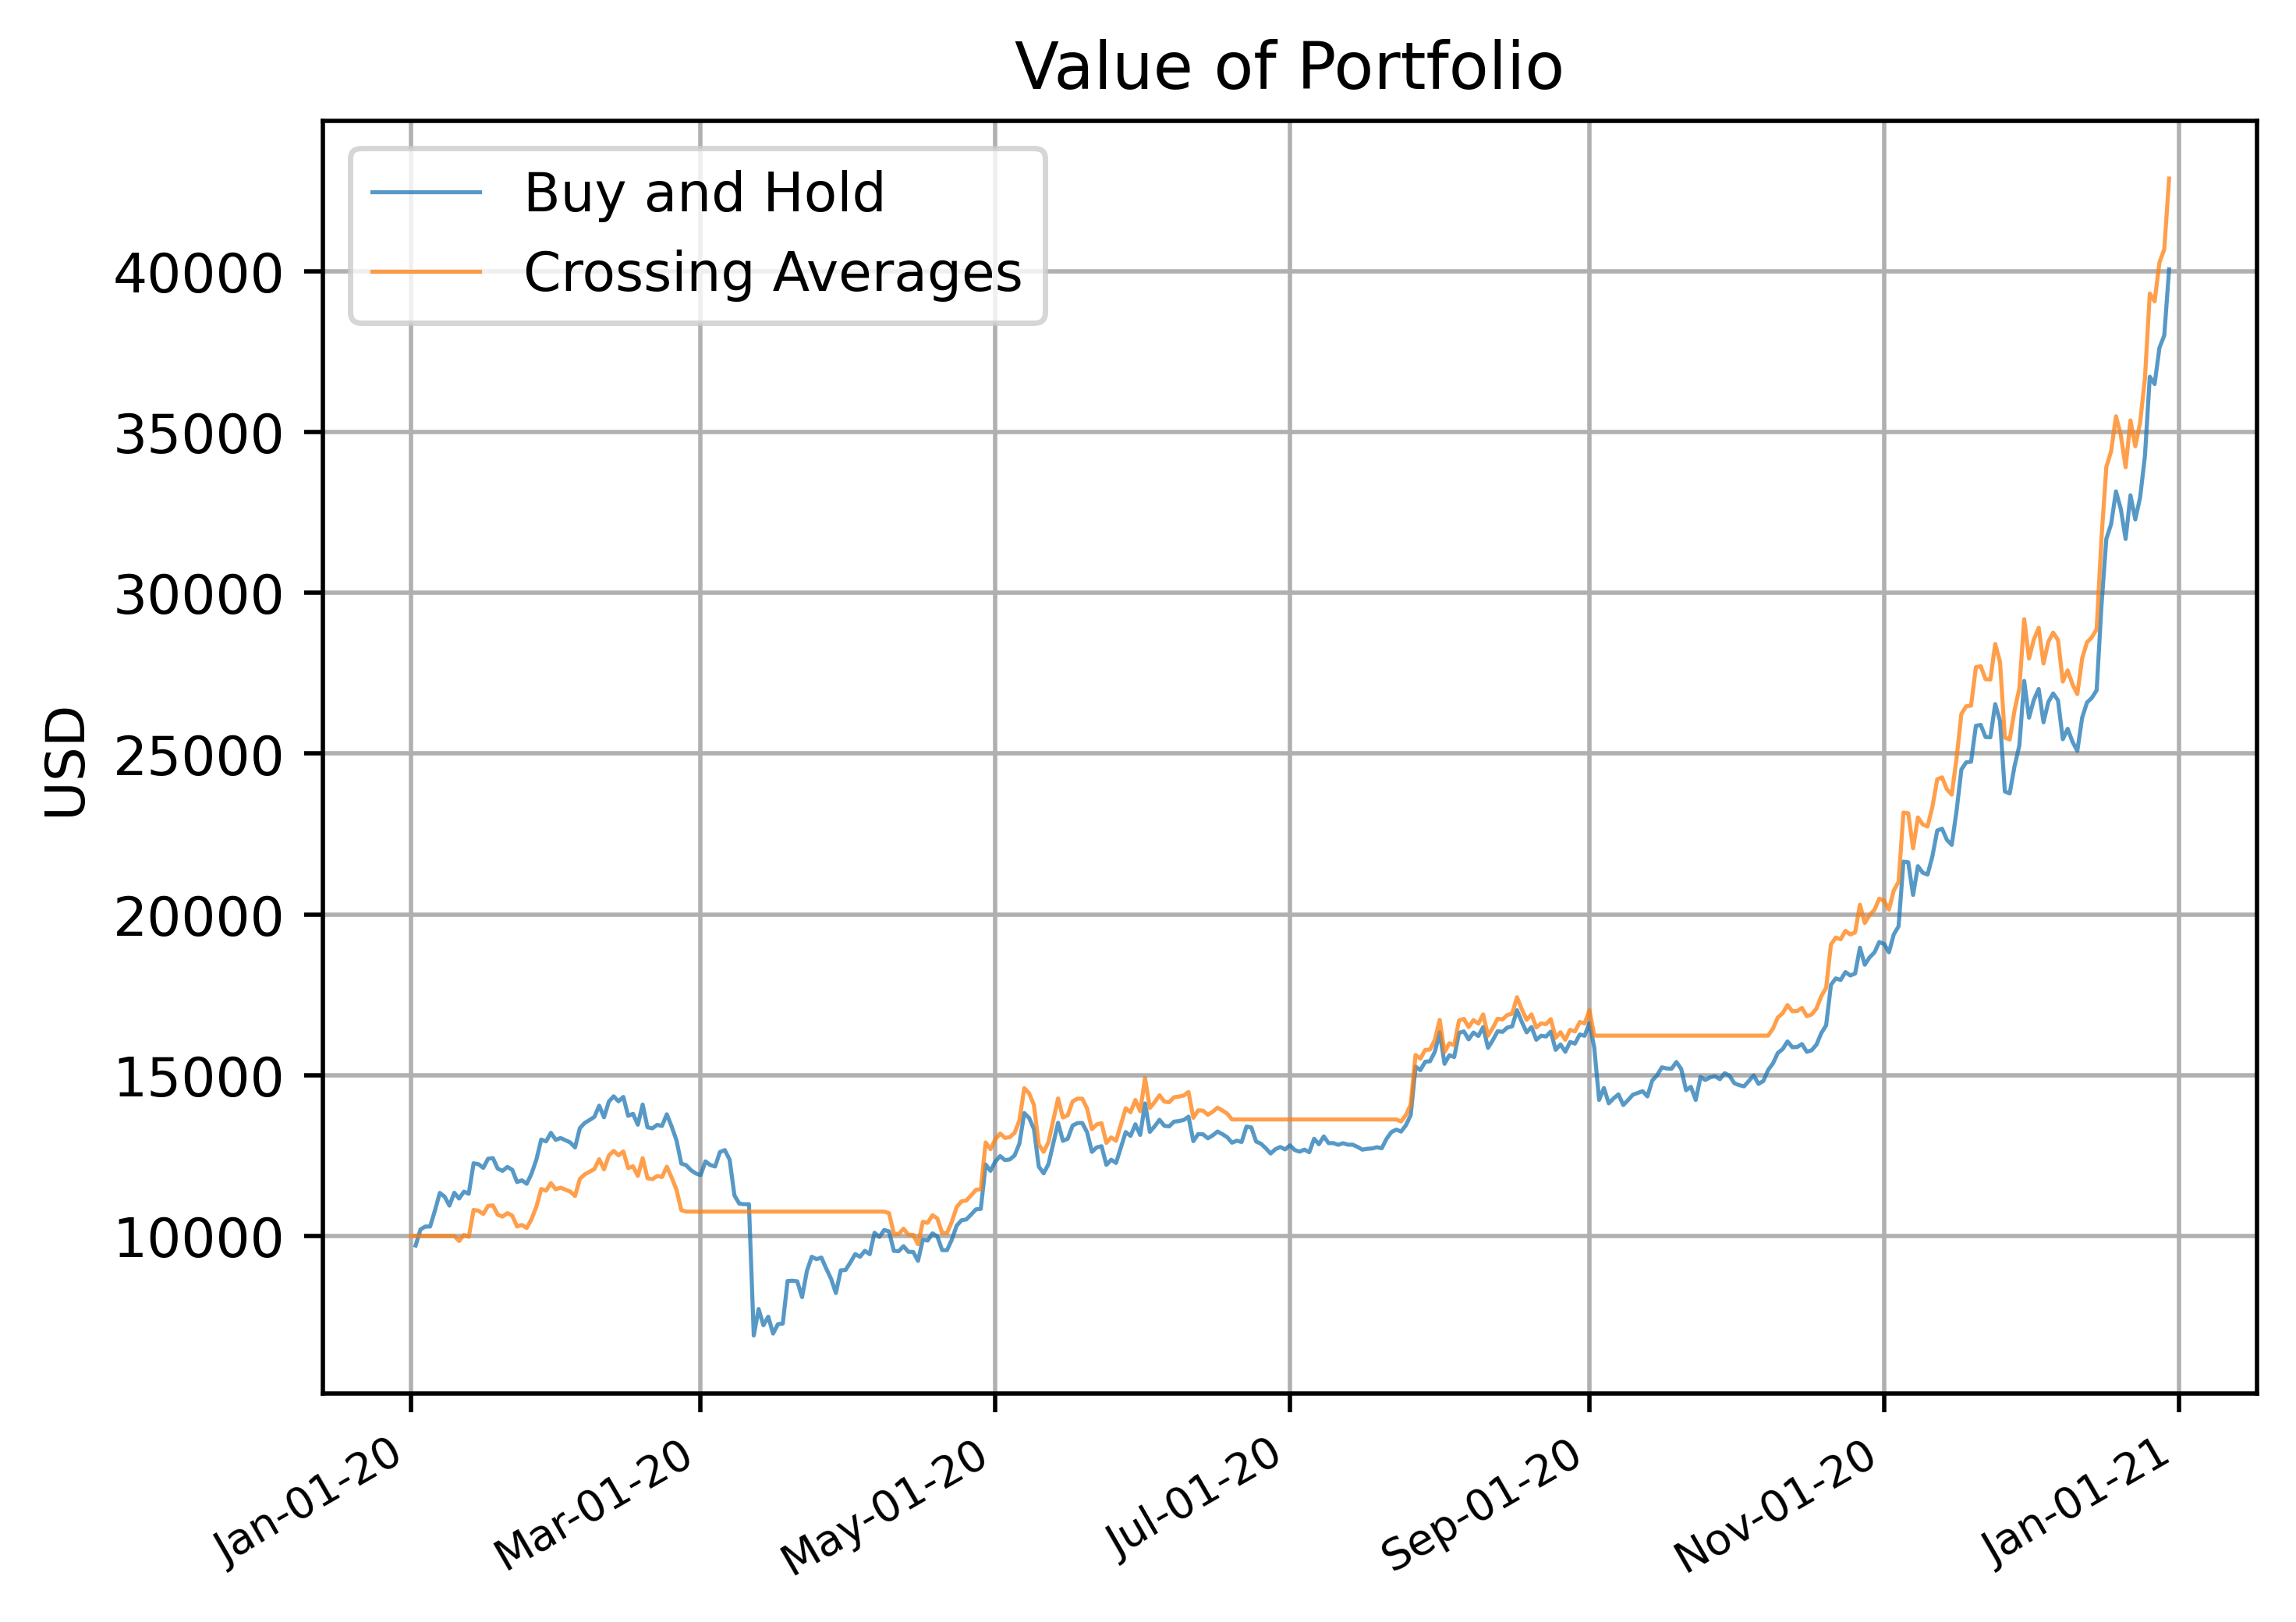

In [22]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

From the plot you can see that both strategies produced in an enormous return on investment, more than quadrupling the value of our portfolio. Obviously this was due to the meteoric rise of Bitcoin prices near the end of the year and you should certainly ***not*** consistently expect similar returns in the future.

However, it's reassuring to see that the trading algorithm at least appears to be feasible, even slightly out performing the baseline Buy and Hold strategy. In the plot you can clearly see the periods in which the algorithm was all in on Bitcoin and the periods where it was holding USD. In the former periods, the growth of the portfolio mirrored the growth of Bitcoin. In the latter period, mostly where Bitcoin was trending downwards, the portfolio remained constant in value and was not brought down by falling Bitcoin prices.


### **Exercise - Test on other time periods**


Over 2020, the price of Bitcoin increased dramatically - so much so that it would be suprising if our algorithm **did not** turn a profit, given how profitable the baseline Buy and Hold strategy was over that year. It would be wise to test the algorithm on some other time periods, perhaps ones where Bitcoin was not on such a dramatic rise to see if the strategy would still be profitable.

**Try it yourself:** Head back to the beginning of the Guided Project to the "_Get Familiar with Bitcoin-USD Exchange Rate Data_" and change the start and end date parameters in the `yf.download()` method call to a date range of your choice. Then try re-running all the code cells in this guided project and see how the algorithm performed!


[*********************100%***********************]  1 of 1 completed


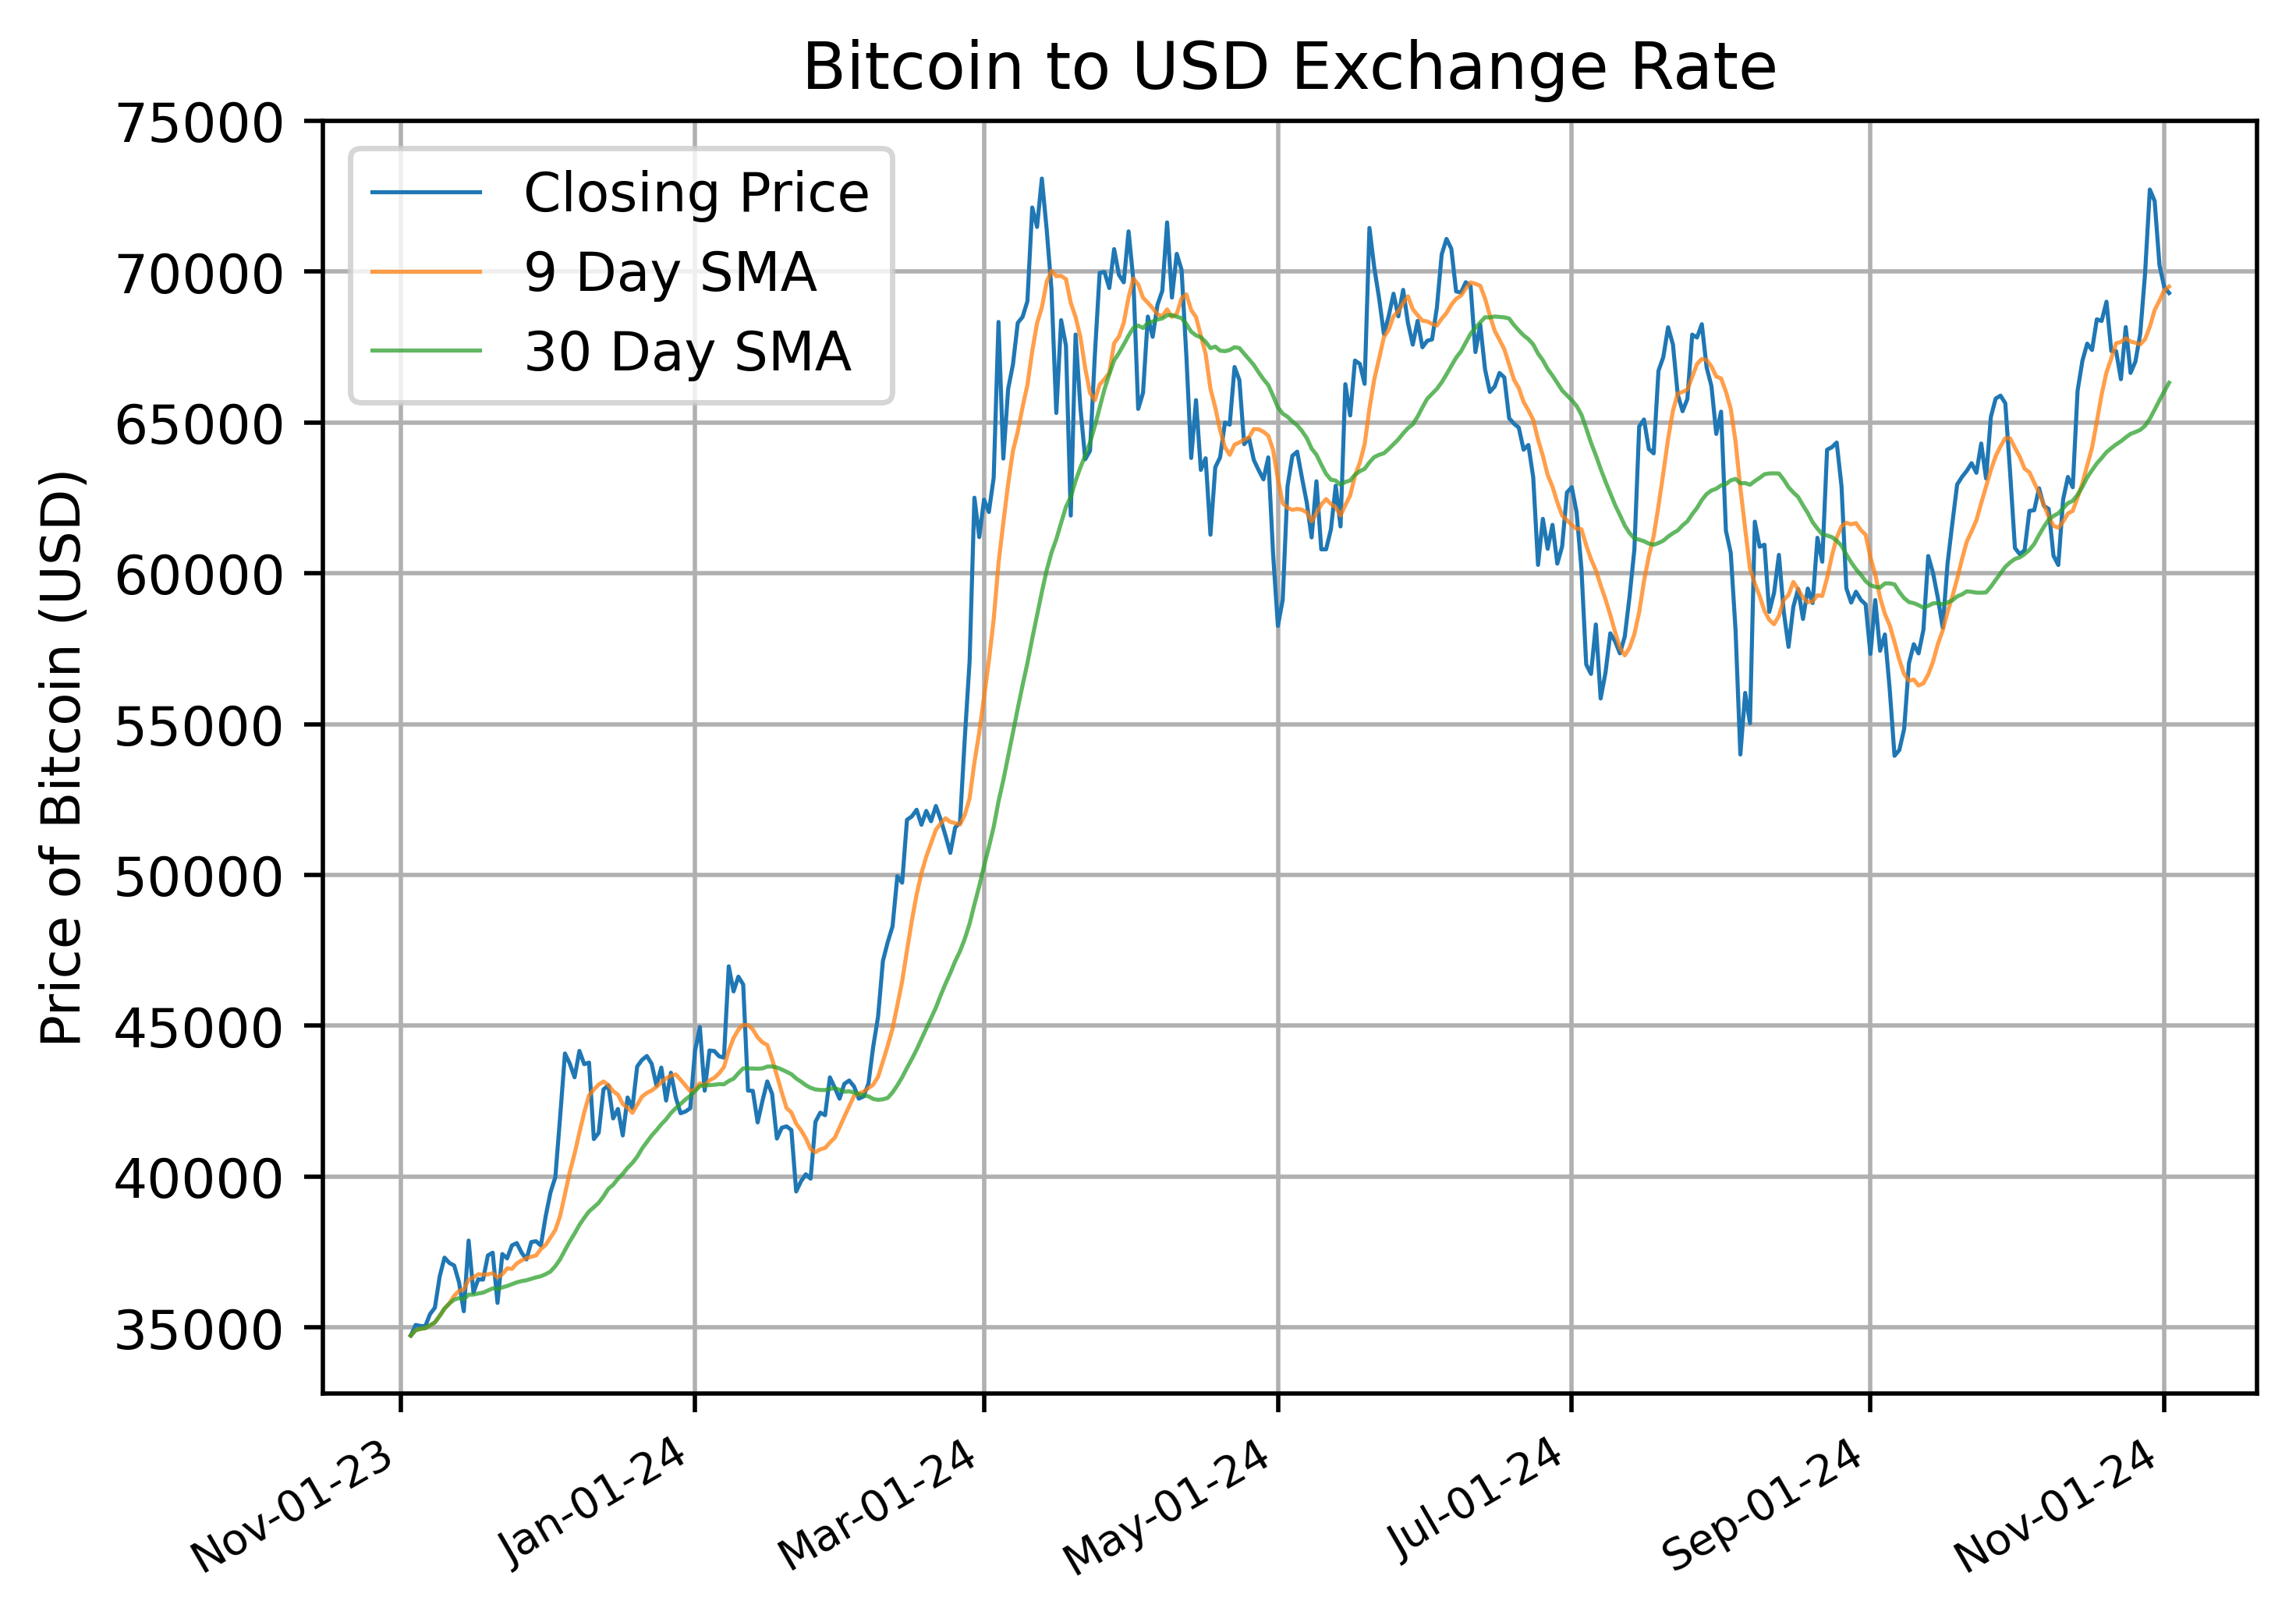

In [28]:
BTC_USD = yf.download("BTC-USD", start='2023-11-03', end='2024-11-03', interval='1d')

BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()

fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

"""
You have already seen the code above earlier - we are simply reusing it.
Below we plot the 9 and 30 day Simple Moving Averages and give them the appropriate label
"""
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

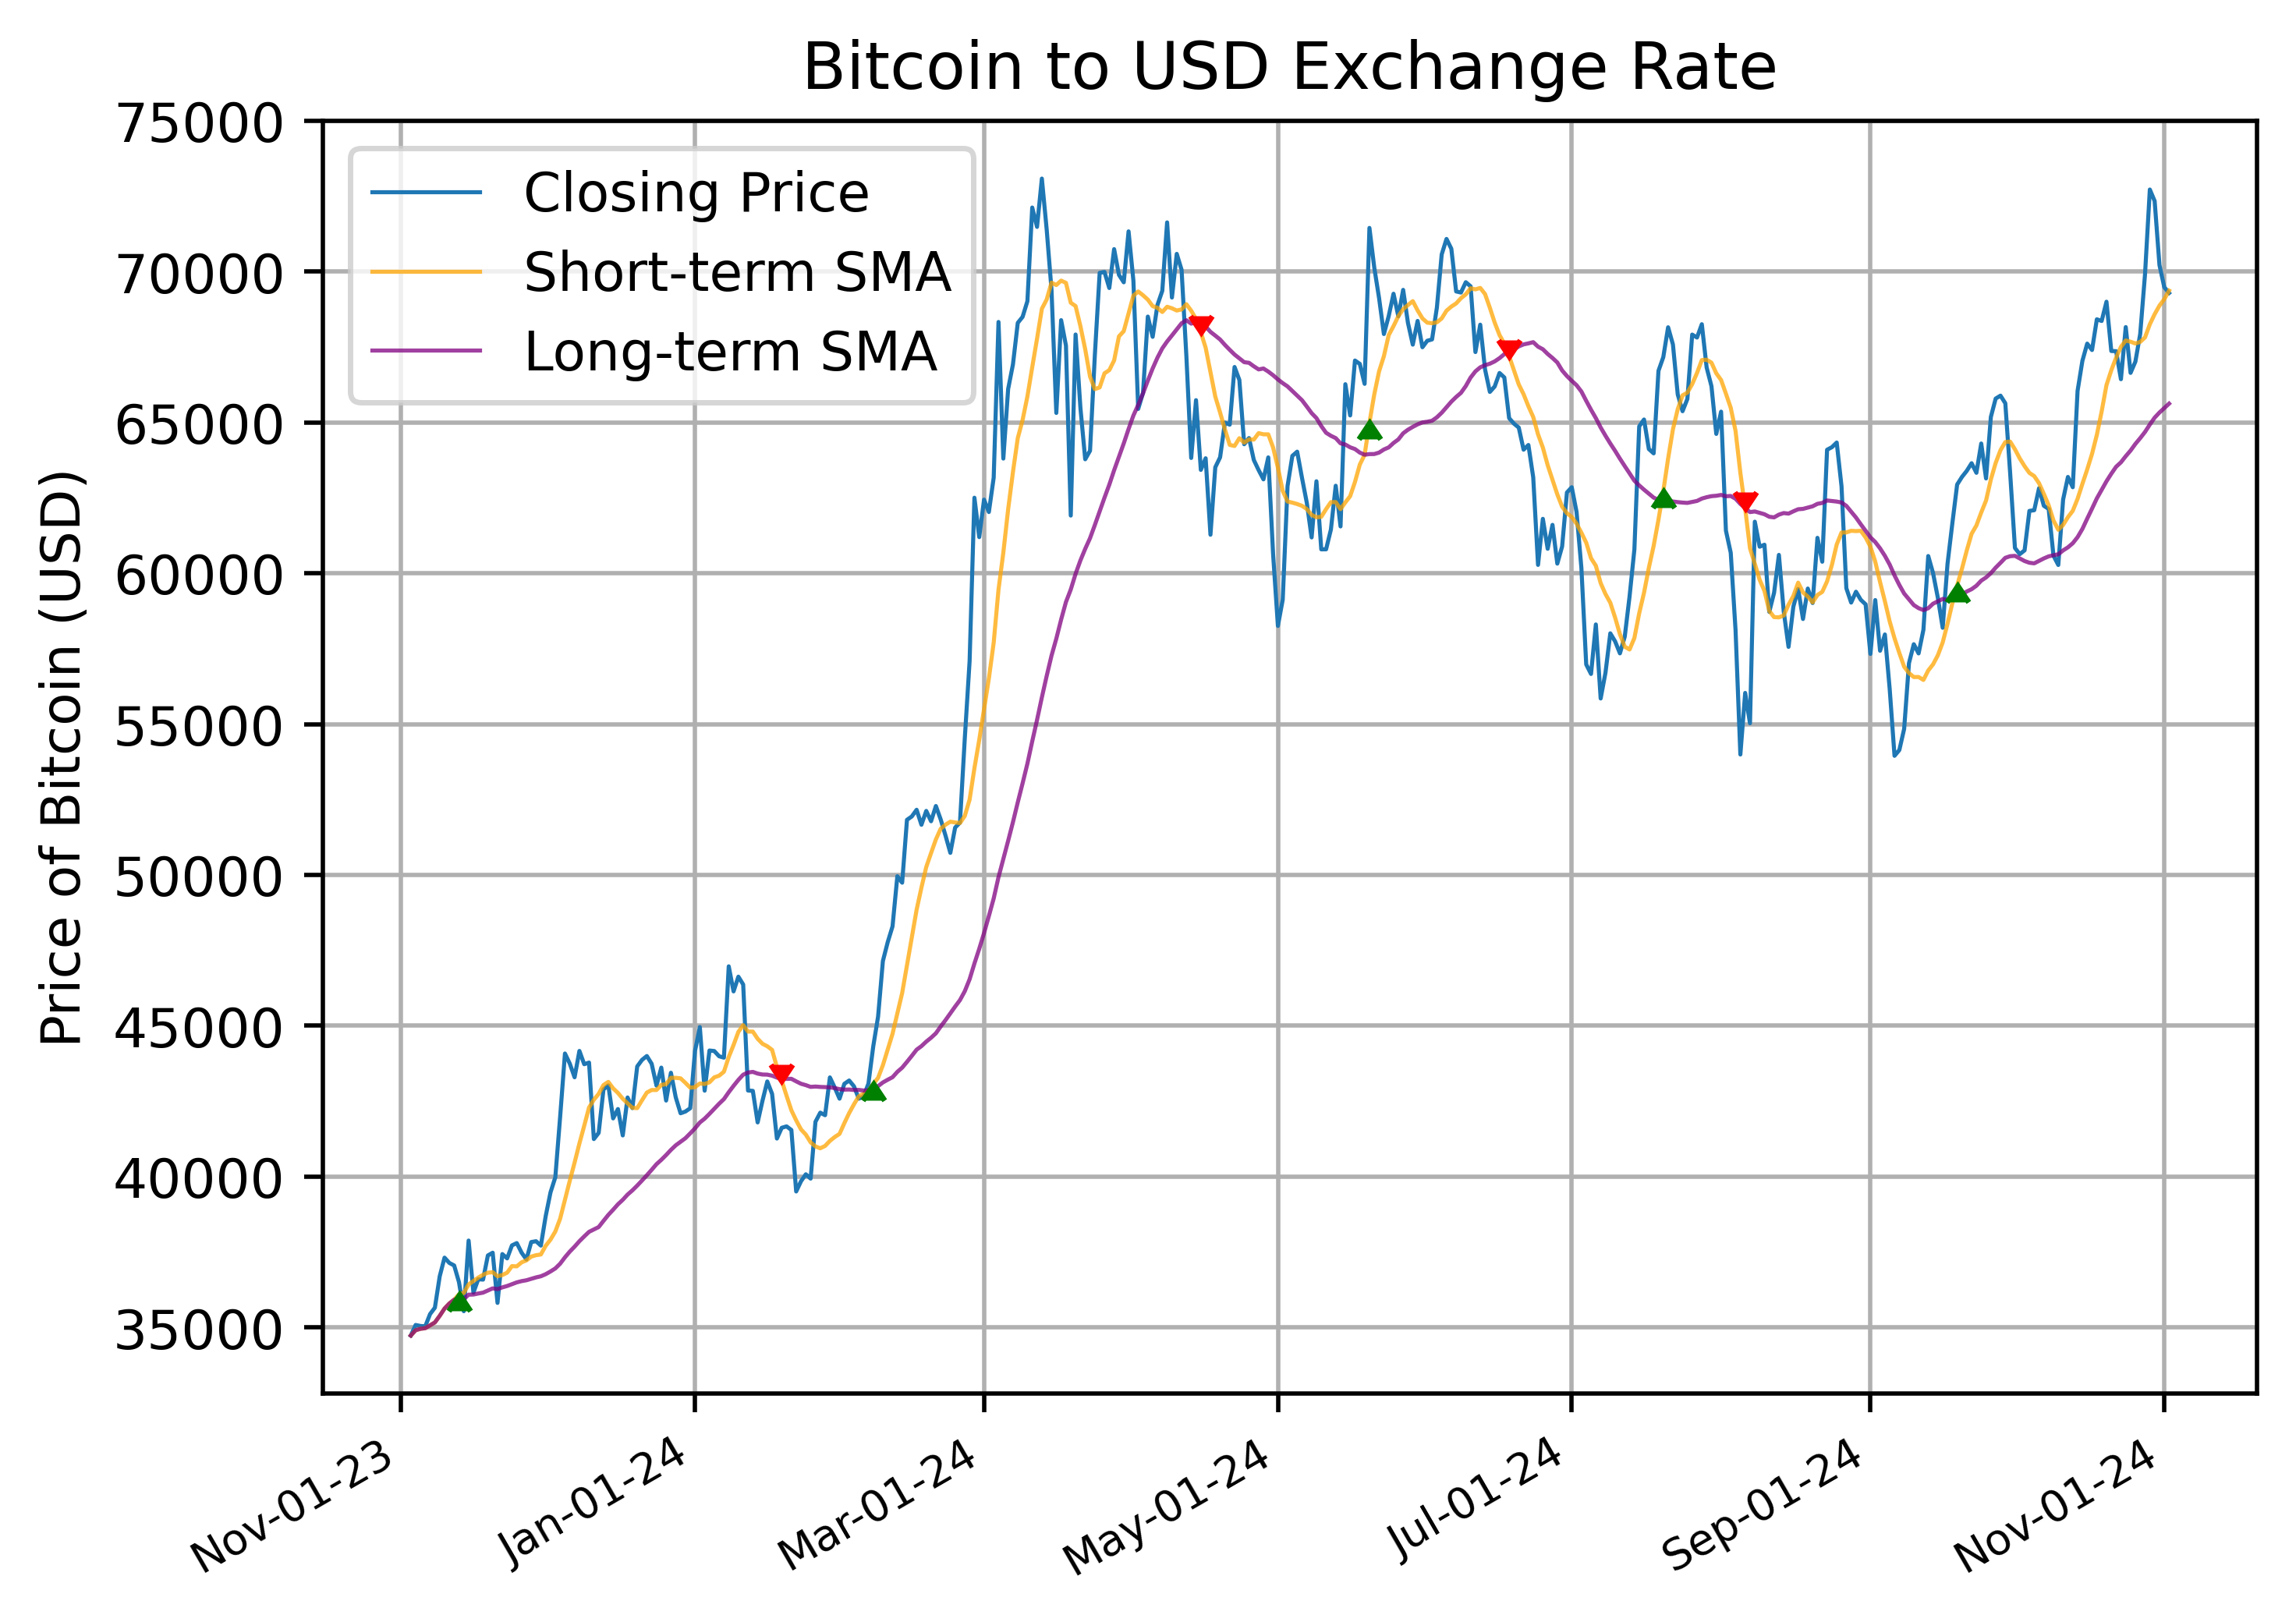

In [29]:
# Create a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Define the intervals for the Fast and Slow Simple Moving Averages (in days)
short_interval = 10
long_interval = 40

# Compute the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

# Create a new column populated with zeros
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   

# Enter your code below and run the cell
trade_signals['Position']=trade_signals['Signal'].diff()

trade_signals.fillna(0)

fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

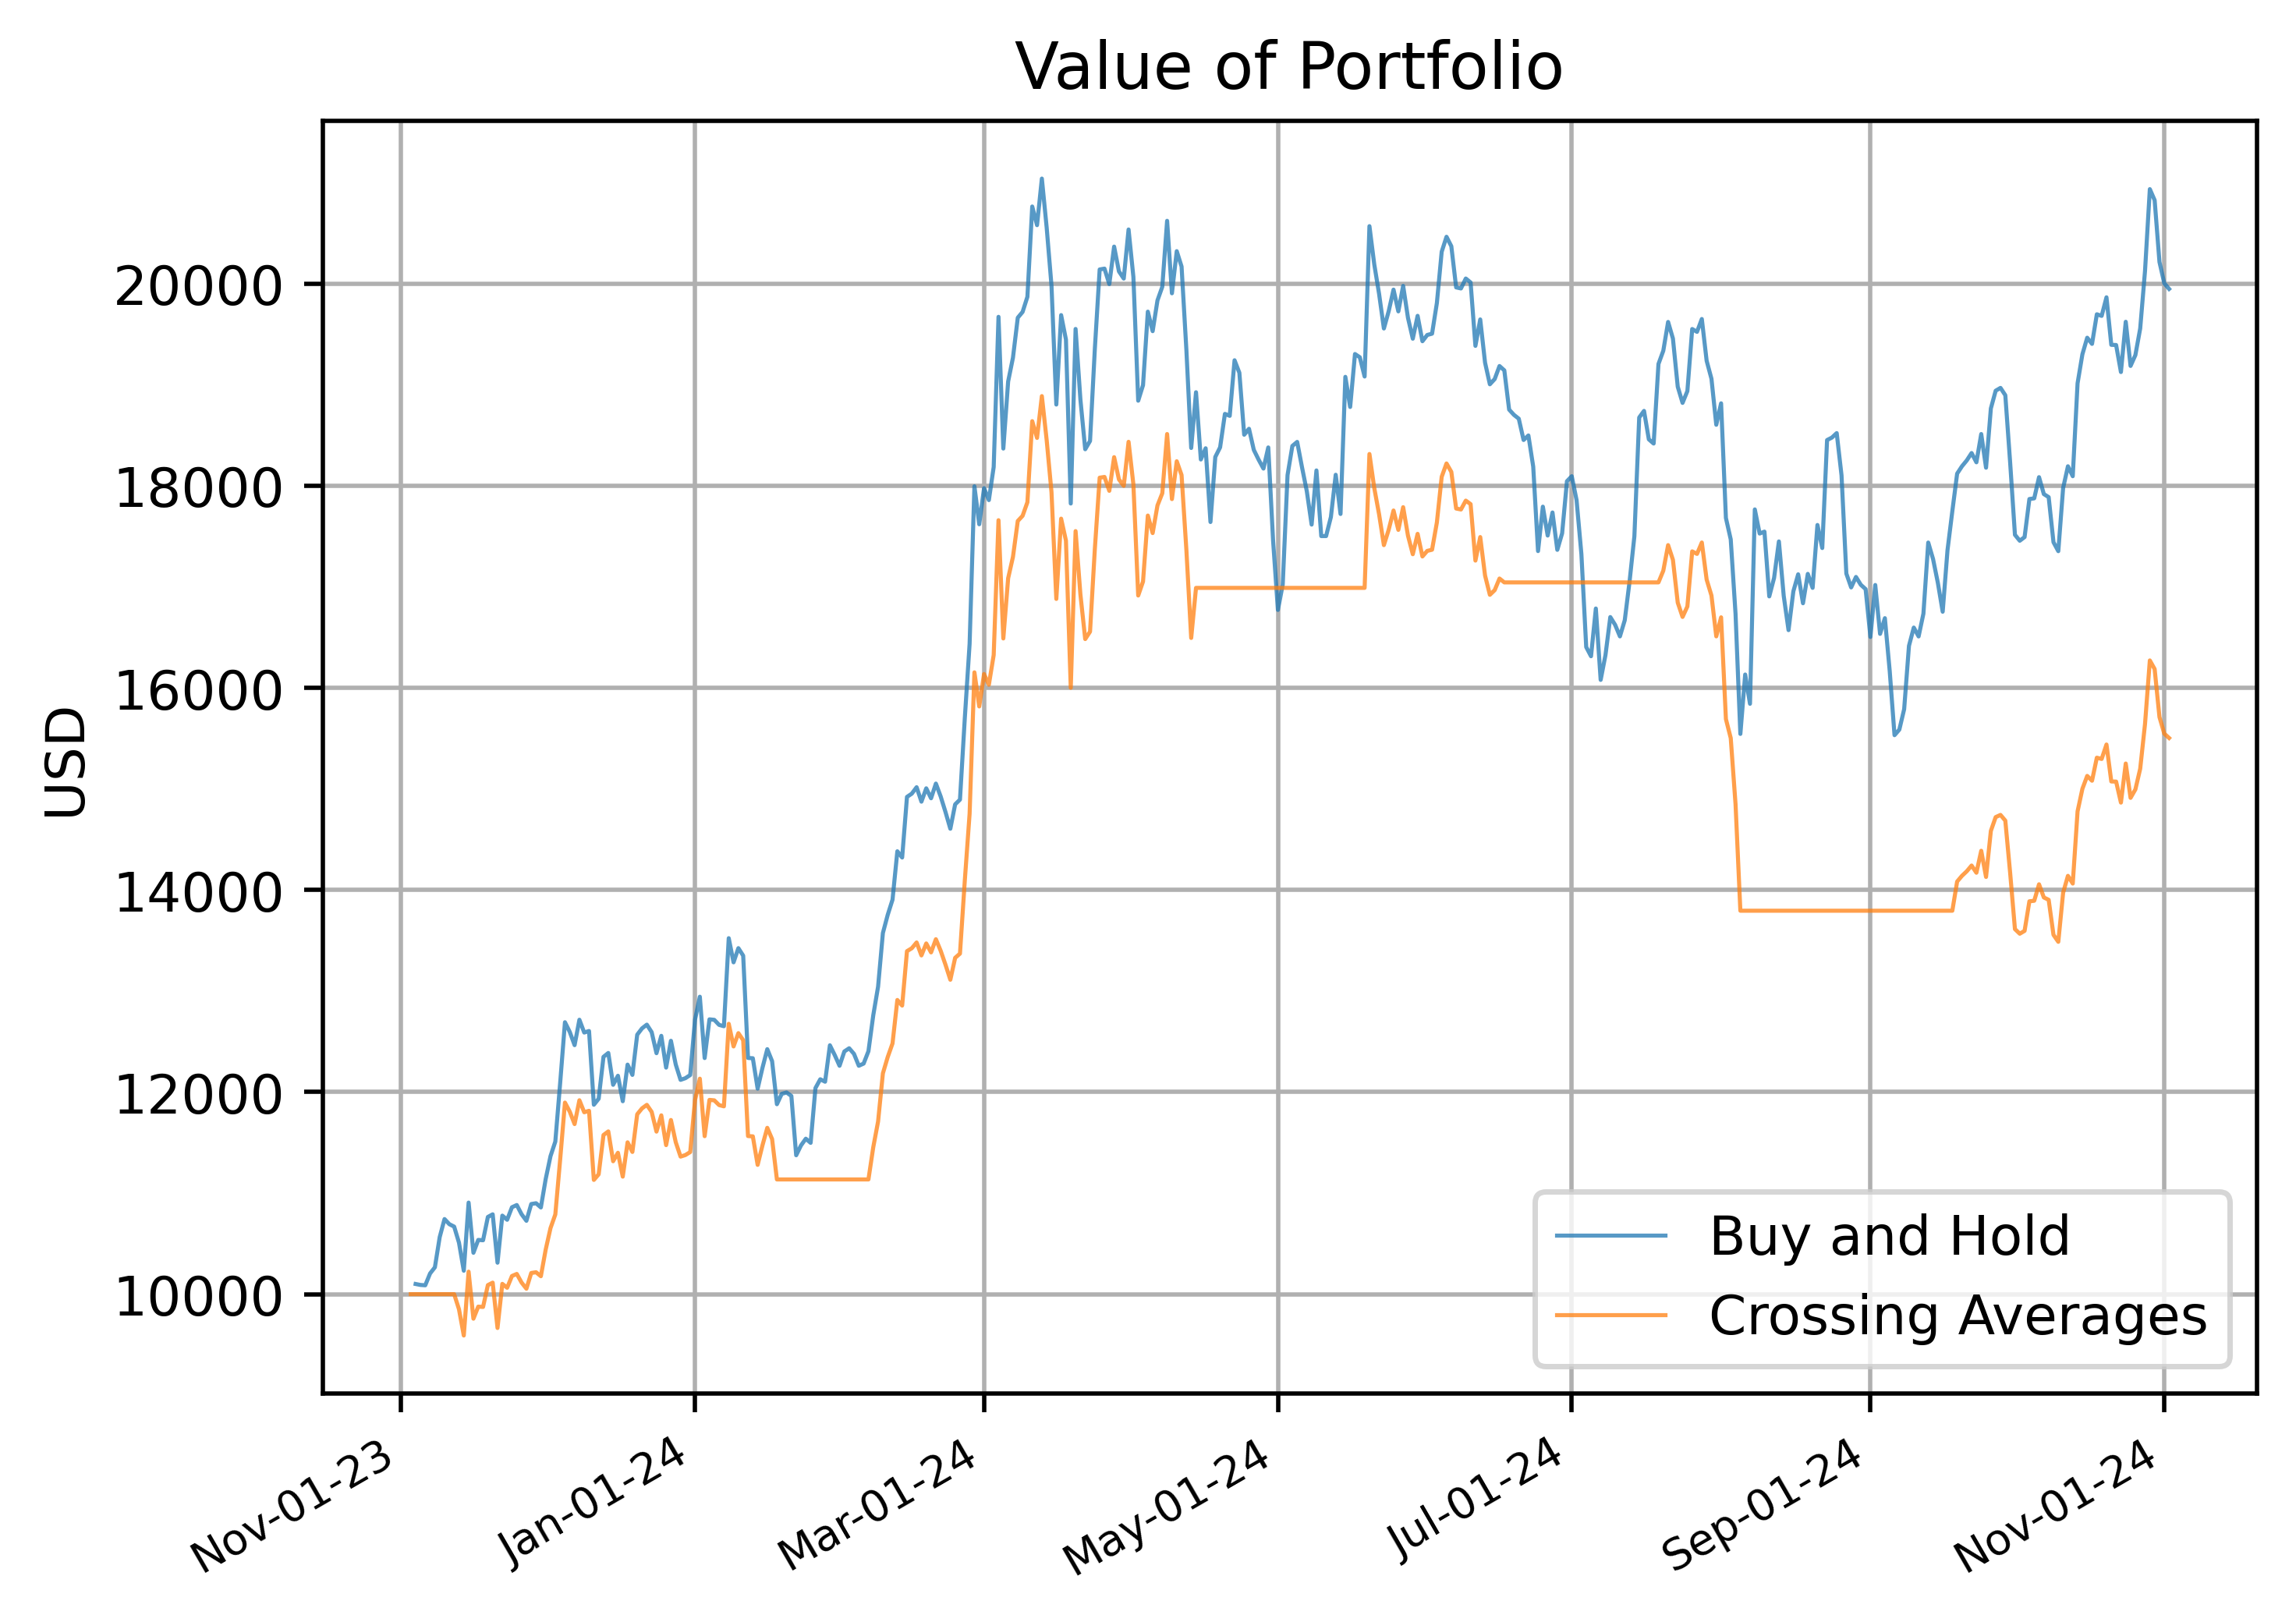

In [30]:
# Define how much money you will start with (in USD)
initial_balance = 10000.0 # ten thousand USD

# Create dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

# Add column containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1) # Current closing price / yesterday's closing price

# Add column containing the daily percent returns of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

# Add column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod() # cumulative product

fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

<details>
<summary><strong>Sample solution</strong> (Click Here)</summary>
    <p> Suppose you would like to backtest the algorithm over the two year period of 2018-2019. The method call for downloading the data would be:</p>
    <p><code>BTC_USD = yf.download("BTC-USD", start='2018-01-01', end='2019-12-31', interval='1d')</code></p>
    <p>Then re-running all the code cells on this time period will give the trading algorithm the following outputs:</p>
    <p><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/analyze-crypto-markets-with-the-coinbase-api/labs/images/output_1_2018-2019.png"></p>
     <p><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/analyze-crypto-markets-with-the-coinbase-api/labs/images/output_2_2018-2019.png"></p>
     <p>As you can see from the second plot, the trading algorithm was still profitable over this time period. In fact, it substantially outperformed the Buy and Hold strategy, which resulted in a net loss.</p>
</details>


### **A Word of Caution**


Backtesting is a useful way to test the viability of a trading strategy but it can come with its fair share of dangers if you're not careful. In particular, with strategies that have tunable parameters, such as the periods of the Simple Moving Averages in our algorithm, it can be tempting to fine tune them to produce the best results on the historical data. You must be careful in doing this as it can result in the algorithm being overfit to the historical data and may not generalize well to future data. This might lead to an unpleasant suprise where the algorithm that you were so confident in based on past data ends up performing horribly on real-time data and trades. No one likes lost money and a bruised ego so once you have an algorithm that you have backtested and found to be viable, it is generally a good idea to forward test it as well.

Forward testing allows you to test your algorithm with real time data and simulate how it would perform in real conditions. You deploy your trading algorithm for real, only you give it fake money to play with. That way if things go horribly wrong, you haven't risked your hard earned cash. If things go well, this may give you more confidence that your algorithm works well and you can feel better about eventually putting real money into it.


---


## **Next Steps**


Great work! You learned how to fetch historical market data, perform some basic analysis, and make some good looking charts. Most interestingly, you implemented a simple trading algorithm that can potentially earn you money while you sleep and tested it. However, this was just the very tip of the iceberg of algorithmic trading - there's an entire industry about exactly this so there's still much to do and learn. Try going back and testing out different parameters for the Moving Average Crossover strategy you implemented, or if you're up for the challenge, try implementing a different strategy all together and compare the two. Good luck!


## Author

[David Pasternak](https://www.linkedin.com/in/david-pasternak-6b84a2208/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsanalyzecryptomarketswiththecoinbaseapi457-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description         |
| ----------------- | ------- | ---------- | -------------------------- |
| 2021-08-05        | 0.1     | David Pasternak       | Created initial release    |


Copyright © 2021 IBM Corporation. All rights reserved.
